In [1]:
addpath(genpath('../../matlab/Linear-STSC/src/'))
addpath(genpath('../../matlab/utils/chebfun/'))
addpath(genpath('../../matlab/utils/tt-toolbox/'))
addpath(genpath('../../matlab/utils/ttfunc/'))
close all; clear;

In [2]:
testname = 'ConstantCoeff';

ttfddata = load(sprintf('plot_data/tt_ST_FD_%s.mat',testname));

ttI = [1:8];
Ns = ttfddata.Ns(ttI);

ttfdtime = cellfun(@(c) c.time, ttfddata.R(ttI,:));
ttfderr = cellfun(@(c) c.err, ttfddata.R(ttI,:));


In [3]:
fortran_err = [];

for i = 1:numel(Ns)

filename = sprintf('plot_data/Fortran/FD_err_%i.dat',Ns(i)); 
fid = fopen(filename, 'r');
data_cell = textscan(fid, '%f');
new_data = cell2mat(data_cell);
fclose(fid);

if exist('fortran_err', 'var') 
    fortran_err = [fortran_err; new_data]; 
else
    fortran_err = new_data; 
end

end

In [4]:
fortran_time = [];

for i = 1:numel(Ns)

filename = sprintf('plot_data/Fortran/FD_time_%i.dat',Ns(i)); 
fid = fopen(filename, 'r');
data_cell = textscan(fid, '%f');
new_data = cell2mat(data_cell);
fclose(fid);

if exist('fortran_time', 'var') 
    fortran_time = [fortran_time; new_data]; 
else
    fortran_time = new_data; 
end

end

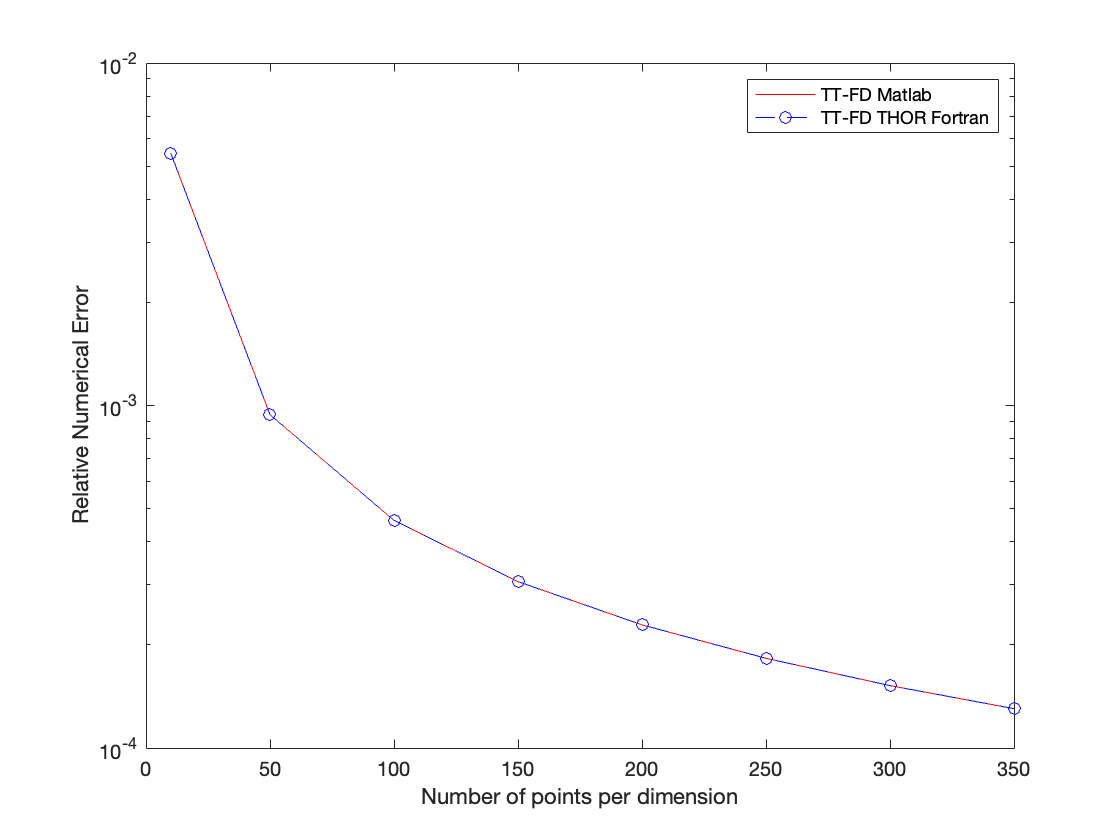

In [5]:
plot(Ns,ttfderr,'-','DisplayName','TT-FD Matlab','color','red');
hold on;
plot(Ns,fortran_err,'--o','DisplayName','TT-FD THOR Fortran','color','blue');

legend();

xlabel(sprintf('Number of points per dimension', Interpreter='latex'))

ylabel(sprintf('Relative Numerical Error',Interpreter='latex'));

set(gca, 'YScale','log');

%xlim([3.9,6.1]);
%ylim([0.01,0.018]);

%xticks([4,5,6]);

clf;

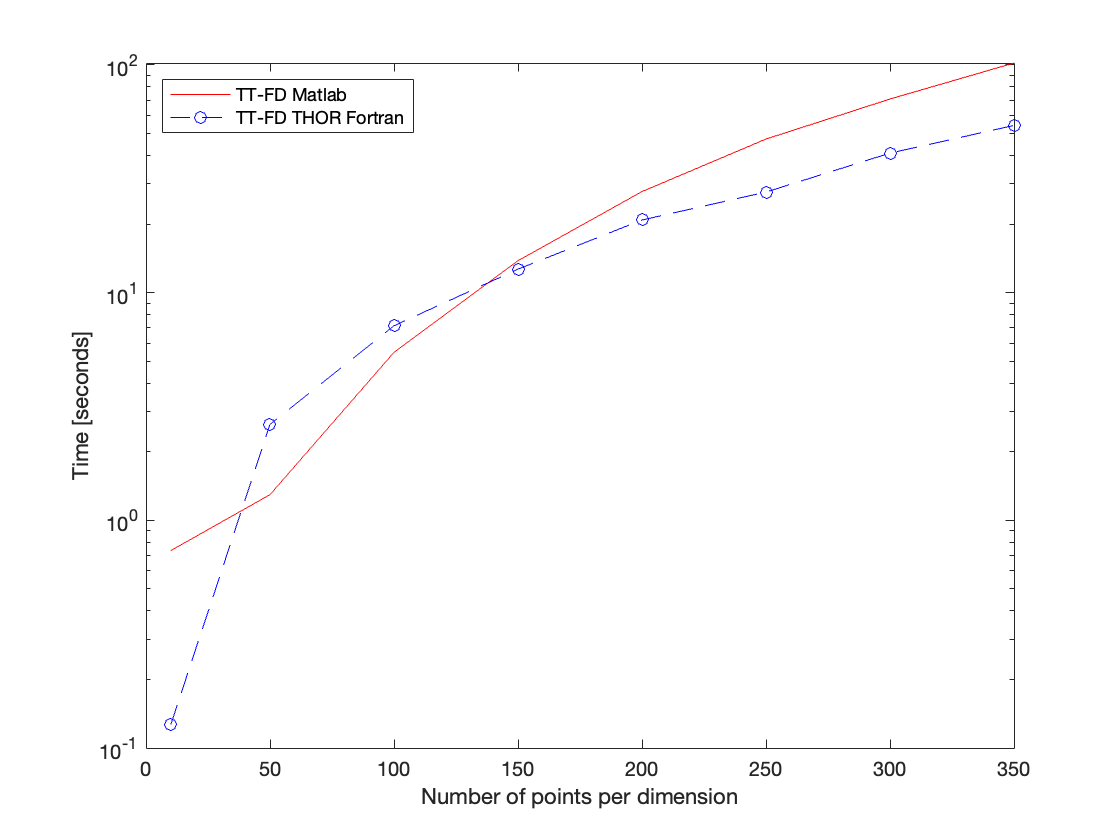

In [6]:
plot(Ns,ttfdtime,'-','DisplayName','TT-FD Matlab','color','red');
hold on;
plot(Ns,fortran_time,'--o','DisplayName','TT-FD THOR Fortran','color','blue');

legend('Location', 'northwest');

xlabel(sprintf('Number of points per dimension', Interpreter='latex'))

ylabel(sprintf('Time [seconds]',Interpreter='latex'));

set(gca, 'YScale','log');

%xlim([3.9,6.1]);

%xticks([4,5,6]);

clf;